<a href="https://colab.research.google.com/github/sanadv/MLCourse/blob/main/Lesson_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/3
1500/1500 [==============================] - 24s 7ms/step - loss: 0.2318 - accuracy: 0.9278 - val_loss: 0.0592 - val_accuracy: 0.9836
Epoch 2/3
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0846 - accuracy: 0.9750 - val_loss: 0.0425 - val_accuracy: 0.9872
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0365 - accuracy: 0.9865
Test accuracy: 0.9865000247955322, Test loss: 0.03651071712374687
313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9865
Precision: 0.9864041779265251
Recall: 0.9863611092147044
F1 Score: 0.9863522062824114


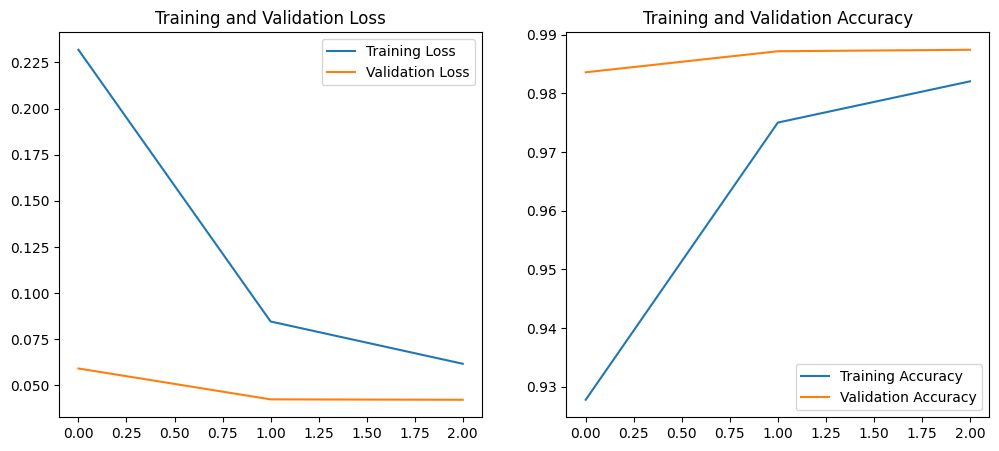

In [1]:
# 8.1 CNN
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras import backend as K
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Splitting train data into train and validation sets
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels), verbose=1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

# Predictions for computing precision, recall, and F1 score
predictions = model.predict(test_images)
predictions = tf.argmax(predictions, axis=1)
true_labels = tf.argmax(test_labels, axis=1)
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Calculating Precision, Recall, and F1 Score
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

# Calculating Accuracy (alternatively, use test_acc from model.evaluate())
accuracy = accuracy_score(y_true, y_pred_classes)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plotting training/validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()
